<a href="https://colab.research.google.com/github/JRamos84/deteccion_fraude/blob/main/notebooks/03_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 03 Feature Selection
**Objetivo**: Seleccionar las características más relevantes para el modelo.

**Contenido**:
- Técnicas de selección de características.
  - Variables categóricas: Método Chi2.
  - Variables numéricas: ANOVA.
- Evaluación de la importancia de las características.



In [1]:
## Importar librerrias
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder


In [2]:
## Importamos las librerias a usar
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/cursos-analisis-datos/data-science/proyecto/propuestas/propuesta1/ieee-fraud-detection'

Mounted at /content/drive


In [3]:
# Guardar X y y en archivos CSV

#dir_data_processed = '../data/processed'
dir_data_processed = '/content/drive/MyDrive/cursos-analisis-datos/data-science/proyecto/propuestas/propuesta1/ieee-fraud-detection/processed'
ruta_archivo_X_train = os.path.join(dir_data_processed, 'X__train_procesados.csv')
ruta_archivo_X_test = os.path.join(dir_data_processed, 'X_test_procesados.csv')
ruta_archivo_X_val = os.path.join(dir_data_processed, 'X_val_procesados.csv')

ruta_archivo_y_train = os.path.join(dir_data_processed, 'y_train_procesados.csv')
ruta_archivo_y_test = os.path.join(dir_data_processed, 'y_test_procesados.csv')
ruta_archivo_y_val = os.path.join(dir_data_processed, 'y_val_procesados.csv')


X_train_final= pd.read_csv(ruta_archivo_X_train)
X_val_final= pd.read_csv(ruta_archivo_X_val)
X_test_final= pd.read_csv(ruta_archivo_X_test)

y_train_final= pd.read_csv(ruta_archivo_y_train)
y_val_final= pd.read_csv(ruta_archivo_y_val)
y_test_final= pd.read_csv(ruta_archivo_y_test)



### Recuperar nombres de columnas de categoría y numéricas

Importamos las columnas categóricas y numéricas del notebook  notebooks 02_Data_Cleaning_and_Preprocessing

In [8]:
dir_data_processed = '/content/drive/MyDrive/cursos-analisis-datos/data-science/proyecto/propuestas/propuesta1/ieee-fraud-detection/processed'
ruta_archivo_columns = os.path.join(dir_data_processed, 'columns.pkl')
with open(ruta_archivo_columns, 'rb') as file:
    num_cols, cat_cols = pickle.load(file)

print('num_cols:', num_cols)
print('cat_cols:', cat_cols)


num_cols: ['TransactionID', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D10', 'D15', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137

## chi-cuadrado

In [14]:
from sklearn.feature_selection import SelectKBest, chi2

# Seleccionar las mejores características
chi2_selector = SelectKBest(chi2, k=8)
X_kbest = chi2_selector.fit_transform(X_train_final[cat_cols], y_train_final)

# Obtener los nombres de las características seleccionadas
col_selected_catg = X_train_final[cat_cols].columns[chi2_selector.get_support()].tolist()

# Obtener los puntajes y p-valores
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_

# Crear un DataFrame para visualizar los resultados
import pandas as pd

chi2_results = pd.DataFrame({
    'Característica': X_train_final[cat_cols].columns,
    'Chi2': chi2_scores,
    'P-valor': chi2_pvalues
})

# Ordenar el DataFrame por puntaje Chi2
chi2_results = chi2_results.sort_values(by='Chi2', ascending=False)

# Filtrar solo las características seleccionadas
chi2_selected_results = chi2_results[chi2_results['Característica'].isin(col_selected_catg)]

print("Características seleccionadas:")
print(chi2_selected_results)

Características seleccionadas:
         Característica        Chi2       P-valor
2                 card6  235.250513  4.269215e-53
5                 _Days  164.398821  1.237763e-37
4                _Hours   22.791309  1.805805e-06
0             ProductCD    7.585405  5.884275e-03
6     P_emaildomain_bin    6.485643  1.087492e-02
7  P_emaildomain_suffix    5.922247  1.495088e-02
3             _Weekdays    3.078463  7.933546e-02
1                 card4    0.005123  9.429413e-01


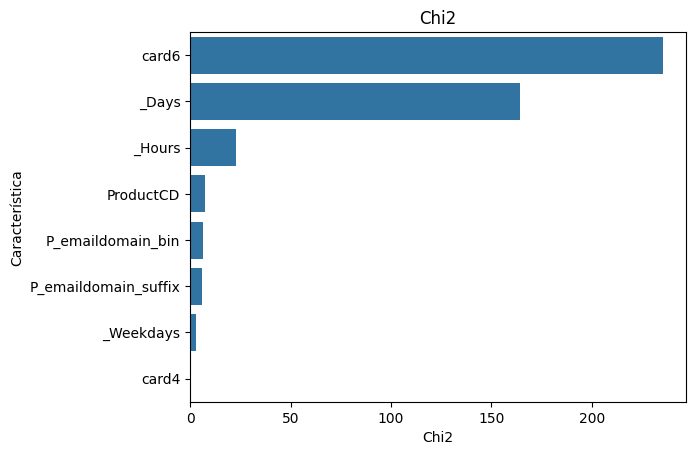

In [17]:
ax,fig = plt.subplots()
ax = sns.barplot(x='Chi2', y='Característica', data=chi2_selected_results)
ax.set_title('Chi2')
plt.show()

- Con el método chi2, se concluye que las variables categóricas más importantes son "card6" y "_Days". En menor medida, "_Hours" y las demás variables también muestran menos importancia.
- vamos a exportar las variables categoricas, card6, _Days y _Hours

In [33]:
cat_cols_selected = ['card6', '_Days', '_Hours']

## Anova

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Selección de las mejores características usando ANOVA
anova_selector = SelectKBest(f_classif, k=100)
X_kbest = anova_selector.fit_transform(X_train_final[num_cols], y_train_final)

# Obtener los nombres de las características seleccionadas
col_selected_num = X_train_final[num_cols].columns[anova_selector.get_support()].tolist()

# Obtener los puntajes F y p-valores
anova_scores = anova_selector.scores_
anova_pvalues = anova_selector.pvalues_

# Crear un DataFrame para visualizar los resultados
anova_results = pd.DataFrame({
    'Característica': X_train_final[num_cols].columns,
    'F-valor': anova_scores,
    'P-valor': anova_pvalues
})

# Ordenar el DataFrame por puntaje F-valor
anova_results = anova_results.sort_values(by='F-valor', ascending=False)

# Filtrar solo las características seleccionadas
anova_selected_results = anova_results[anova_results['Característica'].isin(col_selected_num)]

print("Características seleccionadas:")
print(anova_selected_results)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Características seleccionadas:
    Característica      F-valor       P-valor
137           V283  5937.515336  0.000000e+00
135           V281  4939.353259  0.000000e+00
134           V280  3882.489790  0.000000e+00
136           V282  3811.960361  0.000000e+00
133           V279  3656.772620  0.000000e+00
..             ...          ...           ...
67             V72   228.108549  1.626672e-51
76             V81   227.909243  1.797736e-51
156           V302   226.789621  3.152684e-51
59             V64   225.687582  5.480374e-51
36             V23   222.296317  3.004632e-50

[100 rows x 3 columns]


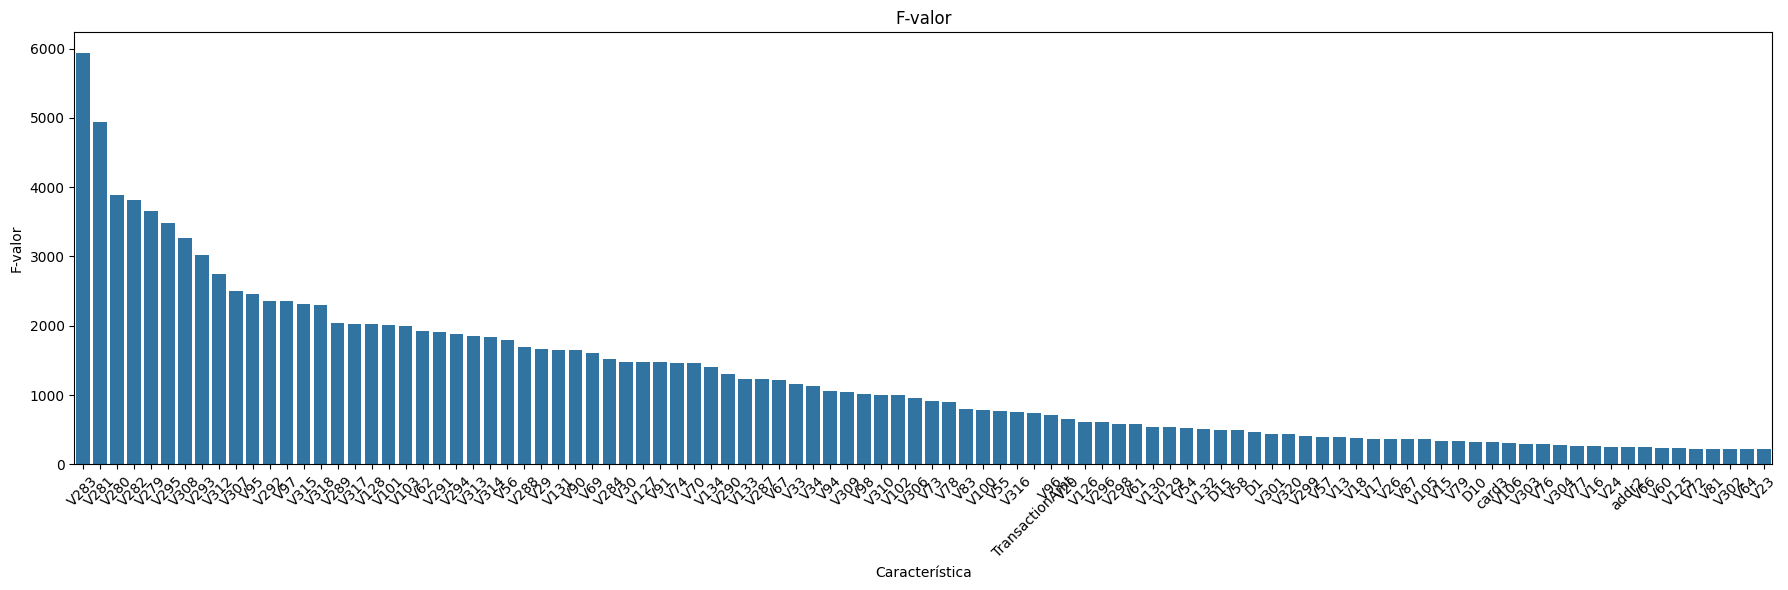

In [28]:
ax,fig = plt.subplots(figsize=(18,6))
ax = sns.barplot(y='F-valor', x='Característica', data=anova_selected_results)
ax.set_title('F-valor')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- Dado que hay una gran cantidad de variables numéricas, utilizaremos un umbral de F-valor de 500 para seleccionar las características más importantes. Luego, evaluaremos en el entrenamiento si esta cantidad es suficiente.

In [43]:
col_selected_num = anova_selected_results[anova_selected_results['F-valor'] >= 500]['Característica'].tolist()

In [44]:
len(col_selected_num) + len(cat_cols_selected)

70

In [45]:

# Guardar las listas en un archivo pickle
dir_data_processed = '/content/drive/MyDrive/cursos-analisis-datos/data-science/proyecto/propuestas/propuesta1/ieee-fraud-detection/processed'
ruta_archivo_columns = os.path.join(dir_data_processed, 'columns_feature_selection.pkl')
with open(ruta_archivo_columns, 'wb') as file:
    pickle.dump((cat_cols_selected , col_selected_num ), file)

num_cols_feature_selection: ['V283', 'V281', 'V280', 'V282', 'V279', 'V295', 'V308', 'V293', 'V312', 'V307', 'V95', 'V292', 'V97', 'V315', 'V318', 'V289', 'V317', 'V128', 'V101', 'V103', 'V62', 'V291', 'V294', 'V313', 'V314', 'V56', 'V288', 'V29', 'V131', 'V90', 'V69', 'V284', 'V30', 'V127', 'V91', 'V74', 'V70', 'V134', 'V290', 'V133', 'V287', 'V67', 'V33', 'V34', 'V94', 'V309', 'V98', 'V310', 'V102', 'V306', 'V73', 'V78', 'V83', 'V100', 'V55', 'V316', 'TransactionAmt', 'V96', 'V20', 'V126', 'V296', 'V298', 'V61', 'V130', 'V129', 'V54', 'V132']
cat_cols_feature_selection: ['card6', '_Days', '_Hours']


## Conclusion

- Se utilizó el método de Chi2 y ANOVA para seleccionar las columnas más relevantes para el entrenamiento.
- En total, se exportaron 70 variables para comparar los modelos de entrenamiento con la cantidad total de variables y con el método de PCA.
